In [13]:
import pandas as pd
import seaborn as sns

In [74]:
df = pd.read_csv("/home/leandro/git/snippy_calls_gene_distance/tmp/all_gene_truth_ref_recall_proportion_distance.csv")
df

,gene,truth,ref,distance,max_recall,observed_recall,recall_ratio
0,Cluster_10085,H131800734,NZ_CP016182.1,0.000000,6,0.0,0.000000
1,Cluster_1009,H131800734,NZ_CP016182.1,0.000000,6,0.0,0.000000
2,Cluster_10093,H131800734,NZ_CP016182.1,0.000000,2,0.0,0.000000
3,Cluster_10094,H131800734,NZ_CP016182.1,0.032967,5,5.0,1.000000
4,Cluster_1011,H131800734,NZ_CP016182.1,0.000000,12,1.0,0.083333
...,...,...,...,...,...,...,...
9363061,GC00010496,063_STEC,CP010140.1,0.030864,12,8.0,0.666667
9363062,GC00010497,063_STEC,CP010140.1,0.026144,9,6.0,0.666667
9363063,GC00010787,063_STEC,CP010140.1,0.020080,5,5.0,1.000000
9363064,GC00010870,063_STEC,CP010140.1,0.015152,3,3.0,1.000000


In [83]:
def get_mean_recall_ratio_between_bounds(df, lower_bound, upper_bound):
    df_between = df.query("@lower_bound <= distance <= @upper_bound")
    recall_ratio_mean = df_between['recall_ratio'].mean()
    return recall_ratio_mean

def plot_lineplot_mean_recall_in_genes_in_several_bins(df, having_at_least_n_variants=1, nb_of_bins=1000, max_bin=0.2):
    df = df.query("max_recall >= @having_at_least_n_variants")
    bounds = [i/nb_of_bins for i in range(0, int(nb_of_bins*max_bin))]
    bounds.append(1.0)

    recall_ratio_means = [get_mean_recall_ratio_between_bounds(df, bounds[i-1], bounds[i]) for i in range(1, len(bounds))]
    x_labels = bounds[1:-1]
    x_labels.append(max_bin)
    
    ax = sns.lineplot(x=x_labels, y=recall_ratio_means)
    ax.plot()

After 10% of edit distance, the results get really weird - are we having FP genes mixed with TP genes (i.e. >10% we say that a gene G is present and we take it into account, when in reality it is not present)?

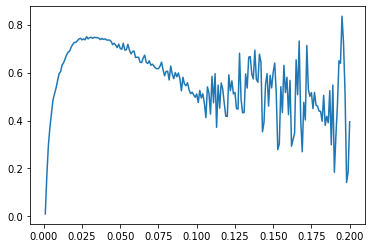

In [84]:
plot_lineplot_mean_recall_in_genes_in_several_bins(df, 1)

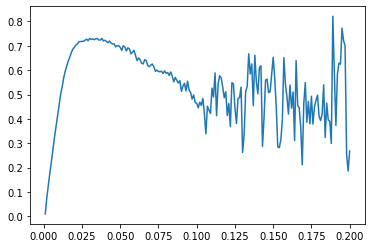

In [85]:
plot_lineplot_mean_recall_in_genes_in_several_bins(df, 10)

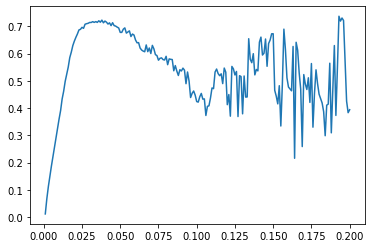

In [87]:
plot_lineplot_mean_recall_in_genes_in_several_bins(df, 25)

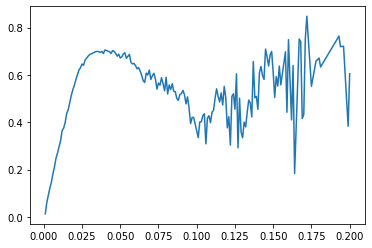

In [88]:
plot_lineplot_mean_recall_in_genes_in_several_bins(df, 50)

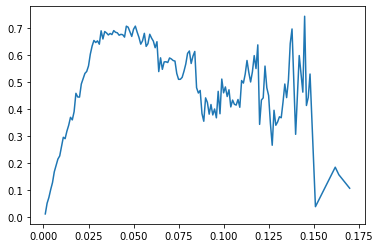

In [89]:
plot_lineplot_mean_recall_in_genes_in_several_bins(df, 100)